In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as BS
import matplotlib.pyplot as plt

In [2]:
# Read in cleaned US dataframe
US = pd.read_csv('../data/us_rep_elections.csv')

In [3]:
# Scrape table of state abbreviations and # of representatives per state from Britannica site
response = requests.get('https://www.britannica.com/topic/United-States-House-of-Representatives-Seats-by-State-1787120')
soup = BS(response.text)
states_reps = pd.read_html(str(soup.find('table')))[0].drop(50)

# Scrape abbreviation table from World Population Review site
response = requests.get('https://worldpopulationreview.com/states/state-abbreviations')
soup = BS(response.text)
states_abv = pd.read_html(str(soup.find('table')))[0]
states_abv = (states_abv.rename({'State':'state'},
                                axis='columns'))

# Merge the two read in dataframes
states = pd.merge(states_reps, states_abv, on='state').drop(columns=['Abbreviation','state'])

# Empty Dictionary to capture results from following for loop
raised_winner = {'Win': 0,
                'Lost': 0}

# Loop through states dataframe and determine if candidates who raised the most money won their race
for index in states.index:
    global raised_winner
    code = states.loc[index]['Code']
    districts = states.loc[index]['representatives']
    
    for dist in range(1, districts+1):
        checker = US[(US['district'] == dist) & (US['state'] == code)].sort_values('raised', ascending=False).head(1)['winner'].bool()
        #print(checker)
        if checker:
            raised_winner['Win'] += 1
        else:
            raised_winner['Lost'] += 1

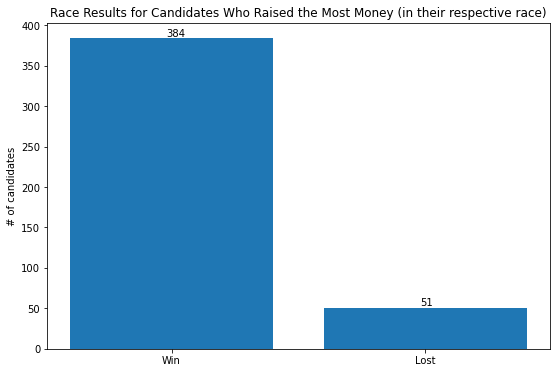

In [4]:
# Unzip items from dictionary
raised_winner_list = raised_winner.items()
x, y = zip(*raised_winner_list)

# Graph results
fig, ax = plt.subplots(figsize=(9,6))
plt.bar(x, y)
plt.title("Race Results for Candidates Who Raised the Most Money (in their respective race)")
plt.ylabel('# of candidates')

xlocs, xlabs = plt.xticks()
xlocs=[i+1 for i in range(0,10)]
xlabs=[i/2 for i in range(0,10)]
for i, v in enumerate(y):
    plt.text(xlocs[i] - 1.02, v + 2.5, str(v));